# MGSC 404 Foundations of Decision Analytics 

## Last Name: Toronga
## First Name:  Nicholas Tariro
## Student ID: 260715831

# Lab 4: Functions, Histograms, Groups and Iteration

Please complete this notebook by filling in the cells provided. 

**Reading**: Textbook chapter [7.2](https://www.inferentialthinking.com/chapters/07/2/visualizing-numerical-distributions.html), chapter [8](https://www.inferentialthinking.com/chapters/08/functions-and-tables.html) and chapter [9](https://www.inferentialthinking.com/chapters/09/randomness.html).

You **must** provide your answer in the designated space. No need to write explanations for your answers unless required. 

Deadline:

This lab assignment is **due Thursday, October 4 at the beginging of class**. Please submit a printed **hard copy**. Late work will not be accepted. 

Tips: 

1. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies to learn more about how to learn cooperatively. Also, questions that puzzle you are likely to have puzzled many Python learners in the past. **Try Googling your questions for answers from online**. In addtion, [this documentation](http://data8.org/datascience/) is a great reference for table operations.  

2. You should start early so that you have time to get help if you're stuck. Drop-in office hours are Thuesday and Thursday 2:30pm-3:30pm in my office 524 Bronfman, right after our class meeting time. 

3. You will get a much smoother start if you play with the lecture notebook before starting. 

## Please write down the names of your collaborator(s) in the cell below:

(name 1), (name 2),...

In [72]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Working with Text using Functions (30 points)


The following table contains the words from four chapters of Charles Dickens' [*A Tale of Two Cities*](http://www.gutenberg.org/cache/epub/98/pg98.txt).  We're going to compute some simple facts about each chapter.  Since we're performing the same computation on each chapter, it's best to encapsulate each computational procedure in a function, and then call the function several times. Run the cell to get a table with one column.

In [73]:
# Just run this cell to load the data.
tale_chapters = Table.read_table("tale.csv")
tale_chapters#.column("Chapter text").item(1)

Chapter text
"I. The Period It was the best of times, it was the wor ..."
"II. The Mail It was the Dover road that lay, on a Frid ..."
III. The Night Shadows A wonderful fact to reflect upo ...
IV. The Preparation When the mail got successfully to ...


In [74]:
x = tale_chapters.column("Chapter text").item(1).split()
len(x)


2016

**Question 1.** Write a function called `word_count` that takes a single argument, the text of a single chapter, and returns the number of words in that chapter.  Assume that words are separated from each other by spaces. 

*Hint:* Try the string method [`split`](https://docs.python.org/3/library/stdtypes.html#str.split) and the function [`len`](https://docs.python.org/3/library/functions.html#len). It is a good idea to play with some toy examples to make sure that your function implements what you want.

In [78]:
def word_count(text):
    arr = text.split(" ")
    return len(arr)
#testing the function
word_count(tale_chapters.column("Chapter text").item(0))

911

**Question 2.** Use the `apply` function on the table from before to create an array called `chapter_lengths` which contains the length of each chapter in `tale_chapters`.

In [79]:
chapter_lengths = tale_chapters.apply(word_count, "Chapter text")
chapter_lengths

array([ 911, 1827, 1468, 3994])

**Question 3.** Write a function called `character_count`.  It should take a string as its argument and return the number of characters in that string that aren't spaces (" "), periods ("."), exclamation marks ("!"), or question marks ("?"). Remember that `tale_chapters` is a table, and that the function takes in only the text of one chapter as input.

*Hint:* Try using the string method `replace` several times to remove the characters we don't want to count.

In [80]:
def character_count(text):
    """takes a string argument"""
    punct = '\n.\'!?'#also removed the \n and \, it did not really make sense to count those as characters
    for i in punct:
        text_0 = text.replace(i, "")
        text_1 = text.replace(" ", "")# to remove the spaces
        text_2 = text_1.replace("\'", "")
        return len(text_2)


In [90]:
character_count(tale_chapters.column("Chapter text").item(3))

20379

**Question 4.** Write a function called `chapter_number`.  It should take a single argument, the text of a chapter from our dataset, and return the number of that chapter, as a Roman numeral.  (For example, it should return the string "I" for the first chapter and "II" for the second.)  If the argument doesn't have a chapter number in the same place as the chapters in our dataset, `chapter_number` can return whatever you like.

To help you with this, we've included a function called `text_before`.  Its documentation describes what it does.

In [109]:
def text_before(full_text, pattern):
    """Finds all the text that occurs in full_text before the specified pattern.

    Parameters
    ----------
    full_text : str
        The text we want to search within.
    param2 : str
        The thing we want to search for.

    Returns
    -------
    str
        All the text that occurs in full_text before pattern.  If pattern
        doesn't appear anywhere, all of full_text is returned.
    
    Examples
    --------
    
    >>> text_before("The rain in Spain falls mainly on the plain.", "Spain")
    'The rain in '
    >>> text_before("The rain in Spain falls mainly on the plain.", "ain")
    'The r'
    >>> text_before("The rain in Spain falls mainly on the plain.", "Portugal")
    'The rain in Spain falls mainly on the plain.'
    """
    return np.array(full_text.split(pattern)).item(0)
#This method works in an equal way with the chapter_number one below
#def chapter_number(chapter_text):
   # return chapter_text.split(".")[0]


    
   
   

In [197]:
#pattern = np.array("The Period It", "The Mail It" , "The Night Shadows " , " The Preparation When")
def chapter_number(chapter_text):
    """takes a string argument"""
    return text_before(chapter_text, ". The")
   

In [204]:
chapter_number(tale_chapters.column("Chapter text").item(0))

'I'

## 2. Uber (30 points)


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` table contains the length of the ride, in minutes.

In [16]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston")
boston.show(4)
print("Manila")
manila.show(4)

Boston


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


**Question 1**
Produce histograms of all ride times in Boston and in Manila, using the given bins. Please put the code for both of them in the following cell, and put the ride times for Boston first.  

/Users/nic_toronga/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


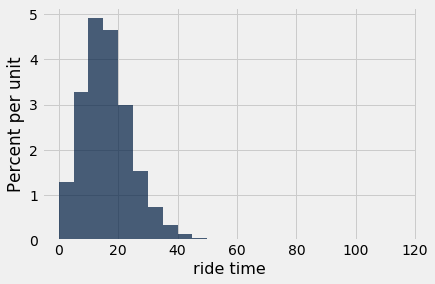

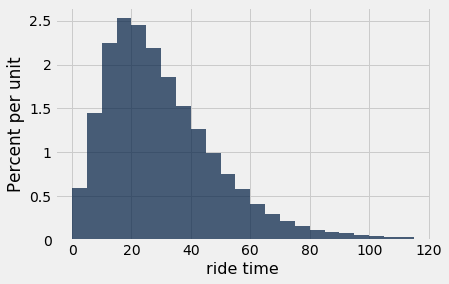

In [34]:
bins = np.arange(0, 120, 5)
boston.hist(3, bins = np.arange(0, 120, 5))  # Histogram for Boston
manila.hist(3, bins = np.arange(0, 120, 5))   # Histogram for Manila

** Question 2** Set the two variables below to estimates of what percentage of rides are less than 10 minutes in Boston and Manila. Find your estimates by visually assessing the histograms. Your solution should consist of only mathematical operations and numbers. Rough estimate is OK. 

In [38]:
boston_under_10 = (5 * 1.25 + 3.25 * 5)
manila_under_10 = (5 * 0.525 + 5 * 1.4)
print(boston_under_10,manila_under_10)

22.5 9.625


**Question 3** Comment on the main difference between the two histograms. What might be causing this?

**People in Boston take Uber for shorter times than people in Manila. In general, people in Manila take Uber for much longer times than people in Boston**: 

**Question 4** The `hod` column in each table represents the hour of the day during which the Uber was called. 0 corresponds to 12-1 AM, 1 to 1-2 AM, 13 to 1-2 PM, etc. Write a function which takes in a table like `boston` or `manila`, and an `hod` number between 0 and 23, and displays a histogram of ride lengths from that hour in that city. Use the same bins as before.

/Users/nic_toronga/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


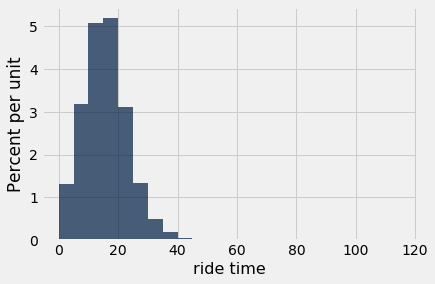

In [42]:
def hist_for_time(tbl, hod):
    bins = np.arange(0, 120, 5)
    new_var = tbl.where("hod", hod)
    return new_var.hist("ride time", bins = np.arange(0, 120, 5))
        
        # use where 
  

#DO NOT DELETE THIS LINE! 
hist_for_time(boston, 12)

## 3. Faculty salaries (25 points)


In the next cell we load a dataset created by the [Daily Cal](http://projects.dailycal.org/paychecker/), containing berkeley faculty, their departments, their positions, and their gross salaries in 2015.

In [59]:
profs = Table.read_table("faculty.csv").where("year", are.equal_to(2015))\
                                       .drop("year", "title")\
                                       .relabeled("title_category", "position")
profs

name,department,position,gross_salary
CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450
PIETER ABBEEL,Computer Science,associate professor,184998
SALLY ABEL,Law,lecturer,3466
ELIZABETH ABEL,English,professor,138775
DOR ABRAHAMSON,Education,associate professor,100300
KATHRYN ABRAMS,Law,professor,319693
BARBARA ABRAMS,Public Health,professor,191162
SARAH ACCOMAZZO,Social Welfare,lecturer,14779
CHARISMA ACEY,City and Regional Planning,assistant professor,101567
DAVID ACKERLY,Biology,professor,182288


We want to use this table to generate arrays with the names of each professor in each department.

**Question 1** Set `prof_names` to a table with two columns. The first column should be called "department" and have the name of every department once, and the second column should be called "faculty" and contain an *array* of the names of all faculty members in that department. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

In [185]:
# Pick between the two functions defined below 
def identity(array):
    return array 

def first(array):
    return array.item(0)

In [117]:
prof_names = profs.select(1,0).group("department", identity)
prof_names.show()

department,name identity
African American Studies,['AYA DE LEON' 'CHIYUMA ELLIOTT' 'NIKKI JONES' 'DAVID KY ...
Agricultural and Resource Economics and Policy,['MAXIMILIAN AUFFHAMMER' 'CHARLES GIBBONS' 'JEFFREY PERL ...
Anthroplogy,['SABRINA AGARWAL' 'STANLEY BRANDES' 'CHARLES BRIGGS' ' ...
Architecture,['MARK ANDERSON' 'JACOB ATHERTON' 'WILLIAM ATWOOD' 'R.GA ...
Art History,['DILIANA ANGELOVA' 'PATRICIA BERGER' 'JULIA BRYAN-WILSO ...
Art Practice,['ALLAN DESOUZA' 'AIDA GAMEZ' 'RANDY HUSSONG' 'JENNIFER ...
Astronomy,['GIBOR BASRI' 'STEVEN BECKWITH' 'LEO BLITZ' 'EUGENE CHI ...
Bioengineering,['ADAM ARKIN' 'IRINA CONBOY' 'STEVEN CONOLLY' 'JOHN DUEB ...
Biology,['DAVID ACKERLY' 'HILLEL ADESNIK' 'KELLY AGNEW' 'DORIS B ...
Buddhist Studies,['JANN RONIS']


**Question 2** Set `biggest_range_dept` to the name of the department with the largest salary range, where range is defined as the difference between the lowest and highest salaries in the department. 

*Hint:* First you'll need to define a new function `salary_range` which takes in an array of salaries and returns the salary range of the corresponding department. Think about what functions we have discussed can combine and give you this range. Then, set `department_ranges` to a table containing the names and salary ranges of each department. 

In [147]:
# Define salary_range in this cell
def salary_range(arr):
    return max(arr)-min(arr)

In [128]:



#Trying the other methods

max_amts

min_amts = profs.select(1, 3).group("department", min)
min_amts

max_amts.column(1) - min_amts.column(1)




array([146781., 223480., 265005., 240149., 180065., 152967., 292362.,
       199195., 292583.,      0., 453469., 267417., 356763., 247719.,
       280265., 122728., 100307., 290952., 355507., 103504., 265000.,
       212683.,      0., 495703., 304118., 195513., 314470., 113509.,
       232925.,  34000., 197903., 187518., 223405., 242441., 172011.,
       226244., 203275., 268852., 306932., 239947., 197141., 105824.,
       206392., 185471., 145550., 440536., 175750., 259472., 231410.,
       308937.,      0., 177649., 200450., 183793., 215997., 283213.,
       270303., 439340., 330712., 289182., 463779., 322658., 125070.,
       169849., 192620., 248981., 326941., 195060., 176144., 365479.,
       182323.])

In [156]:
department_ranges = profs.select(1, 3).group("department",salary_range) #salary_range)
department_ranges

#Biggest department ranges

type(department_ranges)
max_range = max(department_ranges.column(1))
biggest_range_dept = department_ranges.where("gross_salary salary_range", max_range)
biggest_range_dept



department,gross_salary salary_range
Economics,495703


In [136]:
department_ranges

department,gross_salary salary_range
African American Studies,146781
Agricultural and Resource Economics and Policy,223480
Anthroplogy,265005
Architecture,240149
Art History,180065
Art Practice,152967
Astronomy,292362
Bioengineering,199195
Biology,292583
Buddhist Studies,0


## 4. Unrolling Loops (15 points)

"Unrolling" a `for` loop means to manually write out all the code that it executes.  The result is code that does the same thing as the loop, but without the loop.  For example, the unrolled version of this loop:

    for num in np.arange(3):
        print("The number is", num)

is this:

    print("The number is", 0)
    print("The number is", 1)
    print("The number is", 2)

It's important to understand that this is really all that a `for` loop does.  In this exercise, you'll practice unrolling `for` loops.

In each question below, write code that does the same thing as the given code, but with any `for` loops unrolled.  It's a good idea to run both your answer and the original code to verify that they do the same thing.  (Of course, if the code does something random, you'll get a different random outcome than the original code!)

First, run the cell below to load data that will be used in a few questions.  It's a table with 52 rows, one for each type of card in a deck of playing cards.  A playing card has a "suit" ("♠︎", "♣︎", "♥︎", or "♦︎") and a "rank" (2 through 10, J, Q, K, or A).  There are 4 suits and 13 ranks, so there are $4 \times 13 = 52$ different cards.

In [184]:
deck = Table.read_table("deck.csv")
deck

Rank,Suit
2,♠︎
2,♣︎
2,♥︎
2,♦︎
3,♠︎
3,♣︎
3,♥︎
3,♦︎
4,♠︎
4,♣︎


**Question 1.** Unroll the code below.

In [183]:
# This table will hold the cards in a randomly-drawn hand of
# 5 cards.  We simulate cards being drawn as follows: We draw
# a card at random from the deck, make a copy of it, put the
# copy in our hand, and put the card back in the deck.  That
# means we might draw the same card multiple times, which is
# different from a normal draw in most card games.
hand = Table().with_columns("Rank", make_array(), "Suit", make_array())
for suit in np.arange(5):
    card = deck.row(np.random.randint(deck.num_rows))
    hand.append(card)
hand

Rank,Suit
8,♣︎
10,♣︎
4,♣︎
4,♠︎
3,♦︎


hand = Table().with_columns("Rank", make_array(), "Suit", make_array())
...
...
hand

In [182]:
#Unrolling using hand1 as the new table to avoid using the same names

hand1 =  Table().with_columns("Rank", make_array(), "Suit", make_array())
card1 = deck.row(np.random.randint(deck.num_rows))
hand1.append(card1)
card2 = deck.row(np.random.randint(deck.num_rows))
hand1.append(card2)
card3 = deck.row(np.random.randint(deck.num_rows))
hand1.append(card3)
card4 = deck.row(np.random.randint(deck.num_rows))
hand1.append(card4)
card5 = deck.row(np.random.randint(deck.num_rows))
hand1.append(card5)
hand1

Rank,Suit
5,♥︎
K,♥︎
3,♣︎
2,♣︎
10,♠︎


**Question 2.** Unroll the code below.

In [181]:
for joke_iteration in np.arange(4):
    print("Knock, knock.")
    print("Who's there?")
    print("Banana.")
    print("Banana who?")
print("Knock, knock.")
print("Who's there?")
print("Orange.")
print("Orange who?")
print("Orange you glad I didn't say banana?")

Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Orange.
Orange who?
Orange you glad I didn't say banana?


In [177]:
print("Knock, knock.")
print("Who's there?")
print("Banana.")
print("Banana who?")
print("Knock, knock.")
print("Who's there?")
print("Banana.")
print("Banana who?")
print("Knock, knock.")
print("Who's there?")
print("Banana.")
print("Banana who?")
print("Knock, knock.")
print("Who's there?")
print("Banana.")
print("Banana who?")
print("Knock, knock.")
print("Who's there?")
print("Orange.")
print("Orange who?")
print("Orange you glad I didn't say banana?")

Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Banana.
Banana who?
Knock, knock.
Who's there?
Orange.
Orange who?
Orange you glad I didn't say banana?


**Question 3.** Unroll the code below.

*Hint:* `np.random.randint` returns a random integer between 0 (inclusive) and the value that's passed in (exclusive).

In [180]:
# This table will hold the cards in a randomly-drawn hand of
# 4 cards.  The cards are drawn as follows: For each of the
# 4 suits, we draw a random card of that suit and put it into
# our hand.  The cards within a suit are drawn uniformly at
# random, meaning each card of the suit has an equal chance of
# being drawn.
hand_of_4 = Table().with_columns("Rank", make_array(), "Suit", make_array())
for suit in make_array("♠︎", "♣︎", "♥︎", "♦︎"):
    cards_of_suit = deck.where("Suit", are.equal_to(suit))
    card = cards_of_suit.row(np.random.randint(cards_of_suit.num_rows))
    hand_of_4.append(card)
    
hand_of_4

Rank,Suit
A,♠︎
6,♣︎
K,♥︎
9,♦︎


In [179]:
#using hand_of_4_1 to assess the results easily
hand_of_4_1 = Table().with_columns("Rank", make_array(), "Suit", make_array())
cards_of_suit = deck.where("Suit", are.equal_to("♠︎"))
card = cards_of_suit.row(np.random.randint(cards_of_suit.num_rows))
hand_of_4_1.append(card)
cards_of_suit = deck.where("Suit", are.equal_to("♣︎"))
card = cards_of_suit.row(np.random.randint(cards_of_suit.num_rows))
hand_of_4_1.append(card)
cards_of_suit = deck.where("Suit", are.equal_to("♥︎"))
card = cards_of_suit.row(np.random.randint(cards_of_suit.num_rows))
hand_of_4_1.append(card)
cards_of_suit = deck.where("Suit", are.equal_to("♦︎"))
card = cards_of_suit.row(np.random.randint(cards_of_suit.num_rows))
hand_of_4_1.append(card)
hand_of_4_1


Rank,Suit
4,♠︎
8,♣︎
5,♥︎
5,♦︎


# (For instructor use only) 



## Your Grade: 